<a href="https://colab.research.google.com/github/chronicles041/AIDI1002.FinalProject_Suman_Ako/blob/main/Lec_4_Assignment_1_DRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Dynamic Programming

Welcome to Assignment 1. This notebook will help you understand:
- Policy Evaluation and Policy Improvement.
- Value and Policy Iteration.
- Bellman Equations.

## Georgian College Parking

Georgian College has a shortfall of parking spaces (next to department buildings) especially in winters. To address this, the college administration has decided to modify the pricing scheme to better promote social welfare. In general, the administration considers social welfare higher when more parking is being used, the exception being that the administration prefers that at least one spot is left unoccupied (so that it is available in case someone really needs it). The administration has created a Markov decision process (MDP) to model the demand for parking with a reward function that reflects its preferences. Now the Georgian College administration has hired you &mdash; an expert in dynamic programming &mdash; to help determine an optimal policy.

In [10]:
# %%capture
# %matplotlib inline
import numpy as np
import pickle
import tools

In [11]:

num_spaces = 3
num_prices = 3
env = tools.GCParking(num_spaces, num_prices)
V = np.zeros(num_spaces + 1)
pi = np.ones((num_spaces + 1, num_prices)) / num_prices

In [12]:
V

array([0., 0., 0., 0.])

In [13]:
state = 0
V[state]

0.0

In [14]:

state = 0
value = 10
V[state] = value
V

array([10.,  0.,  0.,  0.])

In [15]:

for s, v in enumerate(V):
    print(f'State {s} has value {v}')

State 0 has value 10.0
State 1 has value 0.0
State 2 has value 0.0
State 3 has value 0.0


In [16]:
pi

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [17]:

state = 0
pi[state]

array([0.33333333, 0.33333333, 0.33333333])

In [18]:

state = 0
action = 1
pi[state, action]

0.3333333333333333

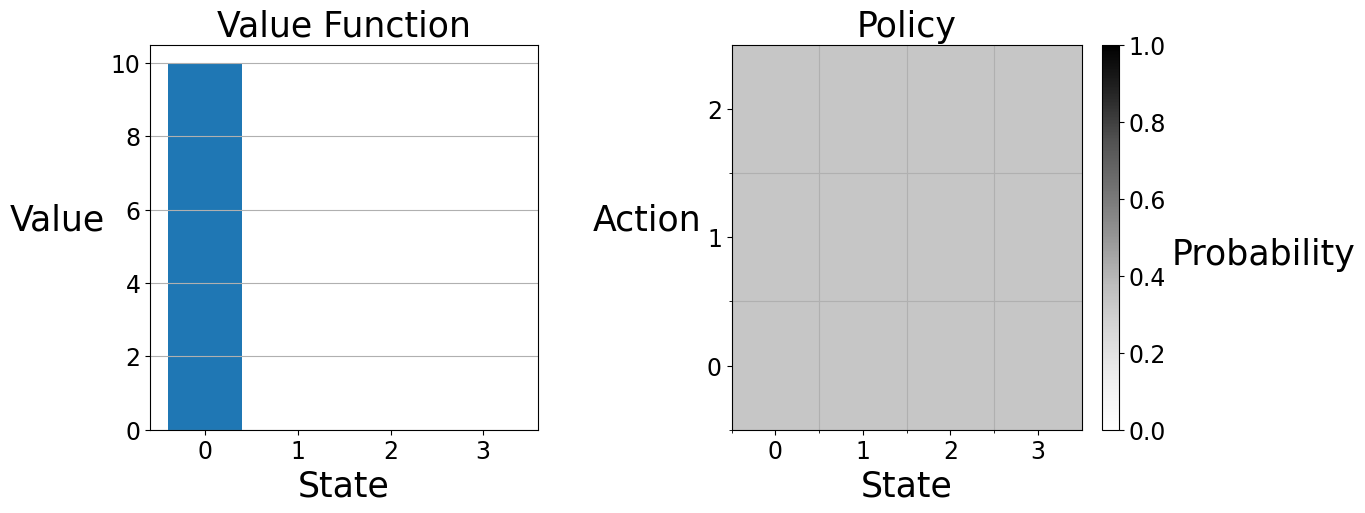

In [19]:
tools.plot(V, pi)

We can visualize a value function and policy with the `plot` function in the `tools` module. On the left, the value function is displayed as a barplot. State zero has an expected return of ten, while the other states have an expected return of zero. On the right, the policy is displayed on a two-dimensional grid. Each vertical strip gives the policy at the labeled state. In state zero, action zero is the darkest because the agent's policy makes this choice with the highest probability. In the other states the agent has the equiprobable policy, so the vertical strips are colored uniformly.

You can access the state space and the action set as attributes of the environment.

In [20]:

env.S

[0, 1, 2, 3]

In [21]:

env.A

[0, 1, 2]


You will need to use the environment's `transitions` method to complete this assignment. The method takes a state and an action and returns a 2-dimensional array, where the entry at $(i, 0)$ is the reward for transitioning to state $i$ from the current state and the entry at $(i, 1)$ is the conditional probability of transitioning to state $i$ given the current state and action.

In [22]:

state = 3
action = 1
transitions = env.transitions(state, action)
transitions

array([[1.        , 0.12390437],
       [2.        , 0.15133714],
       [3.        , 0.1848436 ],
       [2.        , 0.53991488]])

In [23]:

for s_, (r, p) in enumerate(transitions):
    print(f'p(S\'={s_}, R={r} | S={state}, A={action}) = {p.round(2)}')

p(S'=0, R=1.0 | S=3, A=1) = 0.12
p(S'=1, R=2.0 | S=3, A=1) = 0.15
p(S'=2, R=3.0 | S=3, A=1) = 0.18
p(S'=3, R=2.0 | S=3, A=1) = 0.54



## Section 1: Policy Evaluation

You're now ready to begin the assignment! First, the administration would like you to evaluate the quality of the existing pricing scheme. Policy evaluation works by iteratively applying the Bellman equation for $v_{\pi}$ to a working value function, as an update rule, as shown below.

$$\large v(s) \leftarrow \sum_a \pi(a | s) \sum_{s', r} p(s', r | s, a)[r + \gamma v(s')]$$
This update can either occur "in-place" (i.e. the update rule is sequentially applied to each state) or with "two-arrays" (i.e. the update rule is simultaneously applied to each state). Both versions converge to $v_{\pi}$ but the in-place version usually converges faster. **In this assignment, we will be implementing all update rules in-place**, as is done in the pseudocode of chapter 4 of the textbook.

We have written an outline of the policy evaluation algorithm described in chapter 4.1 of the textbook. It is left to you to fill in the `bellman_update` function to complete the algorithm.

In [43]:

def evaluate_policy(env, V, pi, gamma, theta):
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

In [42]:


# [Graded]
def bellman_update(env, V, pi, s, gamma):
    """Mutate ``V`` according to the Bellman update equation."""
    ### START CODE HERE ###
    new_value = 0  # Start with a zero value for the state
    for a in env.A:  # Loop over all actions
        action_prob = pi[s, a]  # Get the policy's probability of taking action a in state s
        transitions = env.transitions(s, a)  # Get possible transitions for this state and action

        for s_, (r, p) in enumerate(transitions):  # Loop over next states and rewards
            reward, transition_prob = r, p
            new_value += action_prob * transition_prob * (reward + gamma * V[s_])

    V[s] = new_value  # Update the value function for state s
    # return V[s]
    ### END CODE HERE ###

The cell below uses the policy evaluation algorithm to evaluate the administration's policy, which charges a constant price of one.




In [44]:
%reset_selective -f "^num_spaces$|^num_prices$|^env$|^V$|^pi$|^gamma$|^theta$"
num_spaces = 10
num_prices = 4
env = tools.GCParking(num_spaces, num_prices)
V = np.zeros(num_spaces + 1)
gc_policy = np.zeros((num_spaces + 1, num_prices))
gc_policy[:, 1] = 1
gamma = 0.9
theta = 0.1
V = evaluate_policy(env, V, gc_policy, gamma, theta)

You can use the ``plot`` function to visualize the final value function and policy.



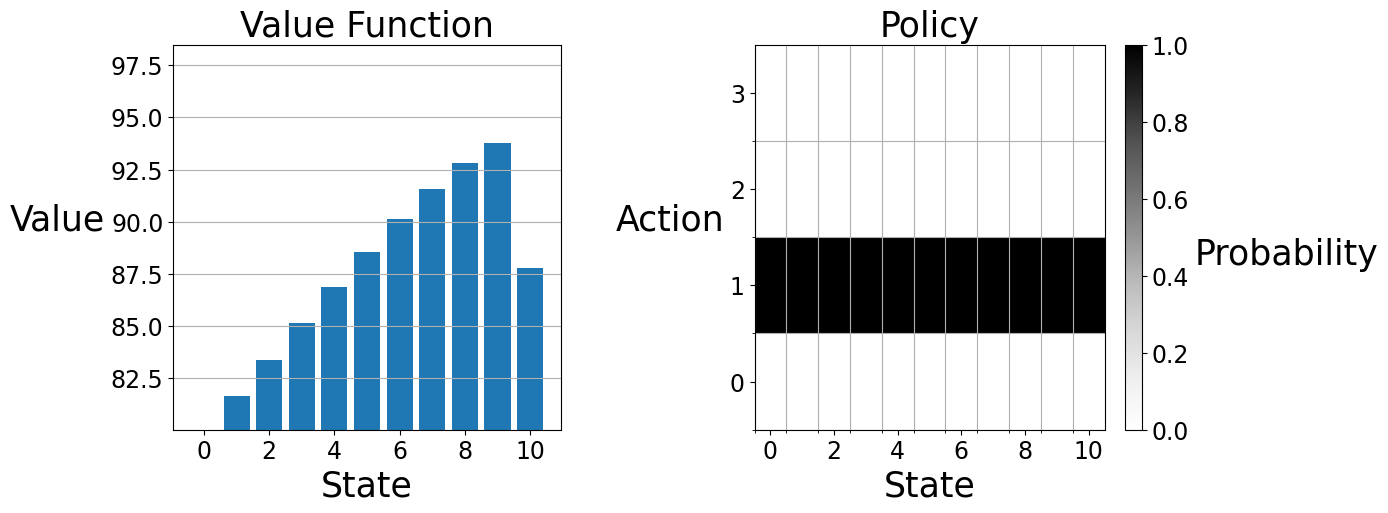

In [45]:
tools.plot(V, gc_policy)

You can check the output (rounded to one decimal place) against the answer below:<br>
State $\quad\quad$    Value<br>
0 $\quad\quad\quad\;$        80.0<br>
1 $\quad\quad\quad\;$        81.7<br>
2 $\quad\quad\quad\;$        83.4<br>
3 $\quad\quad\quad\;$        85.1<br>
4 $\quad\quad\quad\;$        86.9<br>
5 $\quad\quad\quad\;$        88.6<br>
6 $\quad\quad\quad\;$        90.1<br>
7 $\quad\quad\quad\;$        91.6<br>
8 $\quad\quad\quad\;$        92.8<br>
9 $\quad\quad\quad\;$        93.8<br>
10 $\quad\quad\;\;\,\,$       87.8<br>

Observe that the value function qualitatively resembles the administration's preferences &mdash; it monotonically increases as more parking is used, until there is no parking left, in which case the value is lower. Because of the relatively simple reward function (more reward is accrued when many but not all parking spots are taken and less reward is accrued when few or all parking spots are taken) and the highly stochastic dynamics function (each state has positive probability of being reached each time step) the value functions of most policies will qualitatively resemble this graph. However, depending on the intelligence of the policy, the scale of the graph will differ. In other words, better policies will increase the expected return at every state rather than changing the relative desirability of the states. Intuitively, the value of a less desirable state can be increased by making it less likely to remain in a less desirable state. Similarly, the value of a more desirable state can be increased by making it more likely to remain in a more desirable state. That is to say, good policies are policies that spend more time in desirable states and less time in undesirable states. As we will see in this assignment, such a steady state distribution is achieved by setting the price to be low in low occupancy states (so that the occupancy will increase) and setting the price high when occupancy is high (so that full occupancy will be avoided).


## Section 2: Policy Iteration
Now the administration would like you to compute a more efficient policy using policy iteration. Policy iteration works by alternating between evaluating the existing policy and making the policy greedy with respect to the existing value function. We have written an outline of the policy iteration algorithm described in chapter 4.3 of the textbook. We will make use of the policy evaluation algorithm you completed in section 1. It is left to you to fill in the `q_greedify_policy` function, such that it modifies the policy at $s$ to be greedy with respect to the q-values at $s$, to complete the policy improvement algorithm.

In [47]:

def improve_policy(env, V, pi, gamma):
    policy_stable = True
    for s in env.S:
        old = pi[s].copy()
        q_greedify_policy(env, V, pi, s, gamma)
        if not np.array_equal(pi[s], old):
            policy_stable = False
    return pi, policy_stable

def policy_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    policy_stable = False
    while not policy_stable:
        V = evaluate_policy(env, V, pi, gamma, theta)
        pi, policy_stable = improve_policy(env, V, pi, gamma)
    return V, pi

In [46]:

# [Graded]
def q_greedify_policy(env, V, pi, s, gamma):
    """Mutate ``pi`` to be greedy with respect to the q-values induced by ``V``."""
    ### START CODE HERE ###
 q_values = np.zeros(len(env.A))  # Create an array to store Q-values for all actions

    # Loop over all actions
    for a in env.A:
        transitions = env.transitions(s, a)  # Get possible transitions for this state and action
        q_value = 0
        for s_, (r, p) in enumerate(transitions):  # Loop over next states and rewards
            reward, transition_prob = r, p
            q_value += transition_prob * (reward + gamma * V[s_])

        q_values[a] = q_value  # Store the computed Q-value for action a

    # Make the policy greedy: choose the action with the highest Q-value
    best_action = np.argmax(q_values)
    pi[s] = np.zeros(len(env.A))  # Set all action probabilities to 0
    pi[s, best_action] = 1  # Set the probability of the best action to 1
    ### END CODE HERE ###

When you are ready to test the policy iteration algorithm, run the cell below.




In [48]:
%reset_selective -f "^num_spaces$|^num_prices$|^env$|^V$|^pi$|^gamma$|^theta$"
env = tools.GCParking(num_spaces=10, num_prices=4)
gamma = 0.9
theta = 0.1
V, pi = policy_iteration(env, gamma, theta)

You can use the ``plot`` function to visualize the final value function and policy.

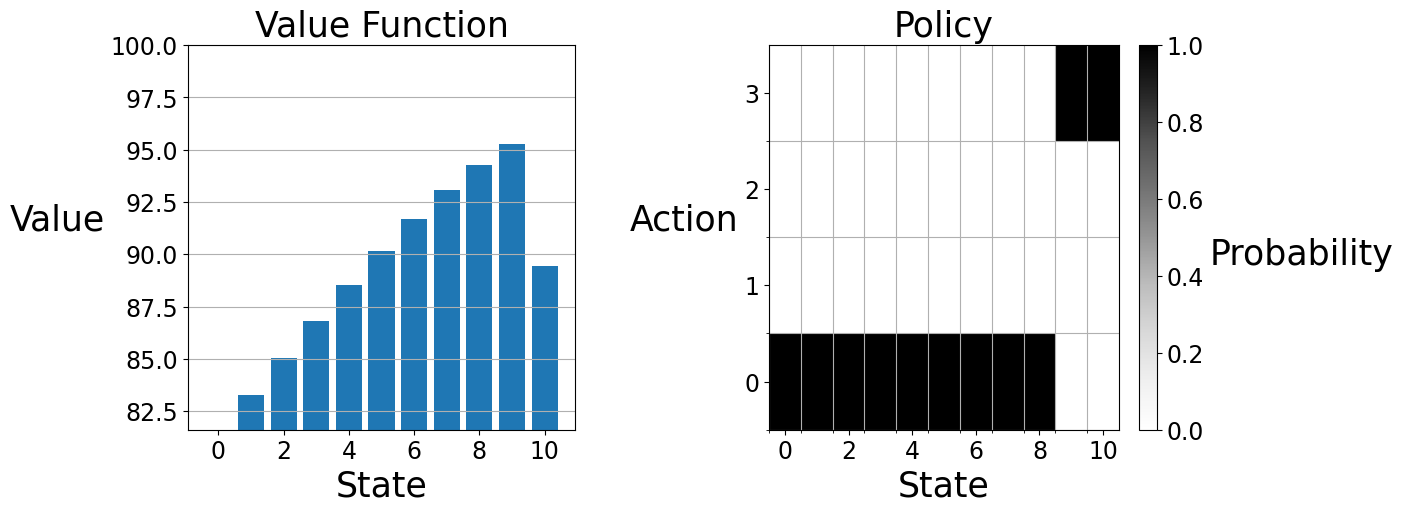

In [49]:
tools.plot(V, pi)

You can check the value function (rounded to one decimal place) and policy against the answer below:<br>
State $\quad\quad$    Value $\quad\quad$ Action<br>
0 $\quad\quad\quad\;$        81.6 $\quad\quad\;$ 0<br>
1 $\quad\quad\quad\;$        83.3 $\quad\quad\;$ 0<br>
2 $\quad\quad\quad\;$        85.0 $\quad\quad\;$ 0<br>
3 $\quad\quad\quad\;$        86.8 $\quad\quad\;$ 0<br>
4 $\quad\quad\quad\;$        88.5 $\quad\quad\;$ 0<br>
5 $\quad\quad\quad\;$        90.2 $\quad\quad\;$ 0<br>
6 $\quad\quad\quad\;$        91.7 $\quad\quad\;$ 0<br>
7 $\quad\quad\quad\;$        93.1 $\quad\quad\;$ 0<br>
8 $\quad\quad\quad\;$        94.3 $\quad\quad\;$ 0<br>
9 $\quad\quad\quad\;$        95.3 $\quad\quad\;$ 3<br>
10 $\quad\quad\;\;\,\,$      89.5 $\quad\quad\;$ 3<br>


## Section 3: Value Iteration
The administration has also heard about value iteration and would like you to implement it. Value iteration works by iteratively applying the Bellman optimality equation for $v_{\ast}$ to a working value function, as an update rule, as shown below.

$$\large v(s) \leftarrow \max_a \sum_{s', r} p(s', r | s, a)[r + \gamma v(s')]$$
We have written an outline of the value iteration algorithm described in chapter 4.4 of the textbook. It is left to you to fill in the `bellman_optimality_update` function to complete the value iteration algorithm.

In [51]:

def value_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_optimality_update(env, V, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    for s in env.S:
        q_greedify_policy(env, V, pi, s, gamma)
    return V, pi

In [50]:

# [Graded]
def bellman_optimality_update(env, V, s, gamma):
    """Mutate ``V`` according to the Bellman optimality update equation."""
    ### START CODE HERE ###
    max_value = float('-inf')  # Initialize the max value to be negative infinity

    # Loop over all actions to find the one that maximizes the expected value
    for a in env.A:
        q_value = 0
        transitions = env.transitions(s, a)  # Get possible transitions for this state and action

        # Calculate the Q-value for this action
        for s_, (r, p) in enumerate(transitions):
            reward, transition_prob = r, p
            q_value += transition_prob * (reward + gamma * V[s_])

        # Track the maximum Q-value
        max_value = max(max_value, q_value)

    # Update the value function for state s
    V[s] = max_value
    ### END CODE HERE ###

When you are ready to test the value iteration algorithm, run the cell below.

In [52]:
%reset_selective -f "^num_spaces$|^num_prices$|^env$|^V$|^pi$|^gamma$|^theta$"
env = tools.GCParking(num_spaces=10, num_prices=4)
gamma = 0.9
theta = 0.1
V, pi = value_iteration(env, gamma, theta)

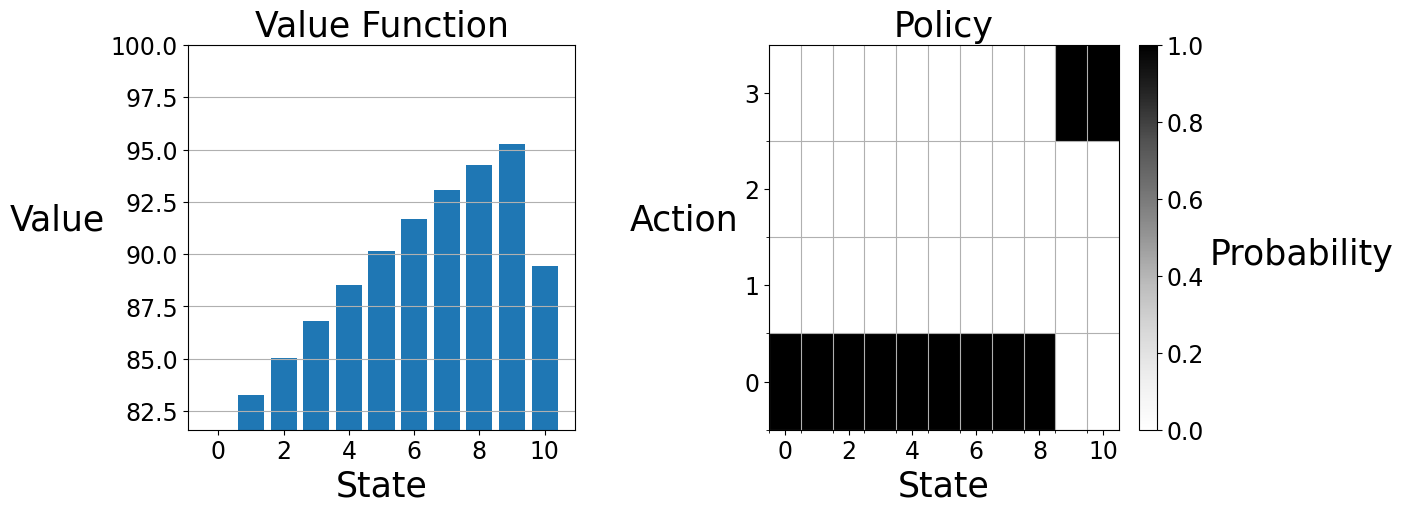

In [53]:
tools.plot(V, pi)

You can check your value function (rounded to one decimal place) and policy against the answer below:<br>
State $\quad\quad$    Value $\quad\quad$ Action<br>
0 $\quad\quad\quad\;$        81.6 $\quad\quad\;$ 0<br>
1 $\quad\quad\quad\;$        83.3 $\quad\quad\;$ 0<br>
2 $\quad\quad\quad\;$        85.0 $\quad\quad\;$ 0<br>
3 $\quad\quad\quad\;$        86.8 $\quad\quad\;$ 0<br>
4 $\quad\quad\quad\;$        88.5 $\quad\quad\;$ 0<br>
5 $\quad\quad\quad\;$        90.2 $\quad\quad\;$ 0<br>
6 $\quad\quad\quad\;$        91.7 $\quad\quad\;$ 0<br>
7 $\quad\quad\quad\;$        93.1 $\quad\quad\;$ 0<br>
8 $\quad\quad\quad\;$        94.3 $\quad\quad\;$ 0<br>
9 $\quad\quad\quad\;$        95.3 $\quad\quad\;$ 3<br>
10 $\quad\quad\;\;\,\,$      89.5 $\quad\quad\;$ 3<br>

In the value iteration algorithm above, a policy is not explicitly maintained until the value function has converged. Below, we have written an identically behaving value iteration algorithm that maintains an updated policy. Writing value iteration in this form makes its relationship to policy iteration more evident. Policy iteration alternates between doing complete greedifications and complete evaluations. On the other hand, value iteration alternates between doing local greedifications and local evaluations.

In [54]:
def value_iteration2(env, gamma, theta):
    V = np.zeros(len(env.S))
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            q_greedify_policy(env, V, pi, s, gamma)
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V, pi

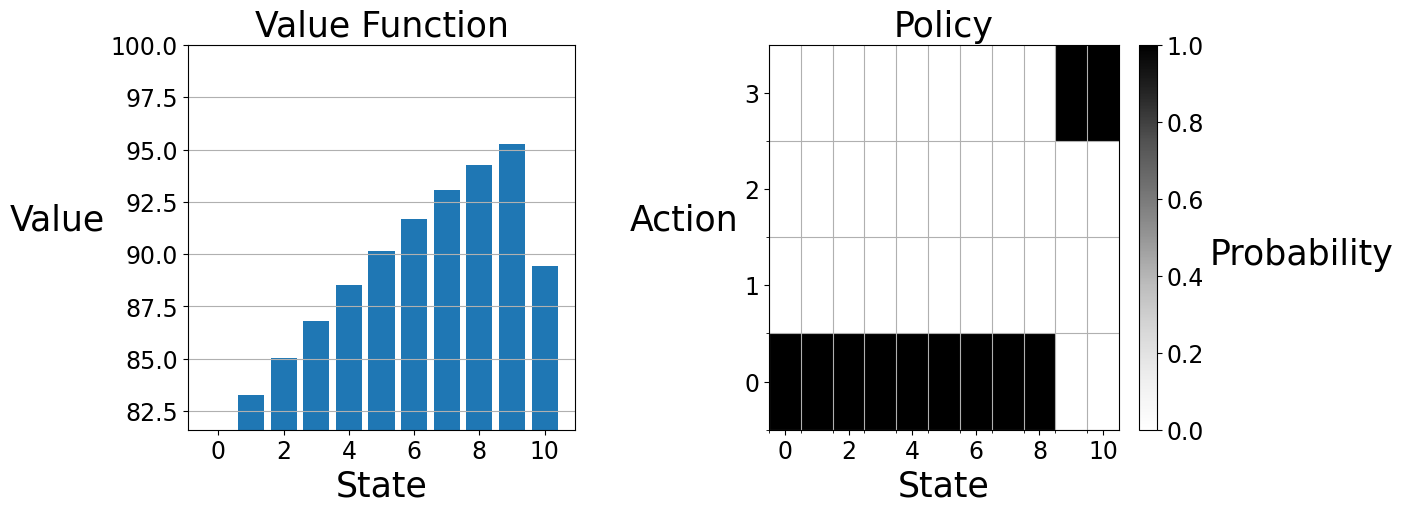

In [55]:
%reset_selective -f "^num_spaces$|^num_prices$|^env$|^V$|^pi$|^gamma$|^theta$"
env = tools.GCParking(num_spaces=10, num_prices=4)
gamma = 0.9
theta = 0.1
V, pi = value_iteration2(env, gamma, theta)
tools.plot(V, pi)